In [2]:
# Importing important librararie
import pymongo
import pprint
import json
import warnings
import pandas as pd, numpy as np
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score

In [3]:
# Load the dataframe
df = pd.read_csv("data/sensor_data.csv")
df.head()

,Unnamed: 0,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [28]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df.head()

,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [29]:
df.shape

(4204799, 27)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204799 entries, 0 to 4204798
Data columns (total 27 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   timestamp                                           object 
 1   Auxiliary Boilers A/B Feed Water Header Pressure 2  float64
 2   Auxiliary Boilers Feed Water Header Pressure        float64
 3   Heat Recovery System Header Mass Flow               float64
 4   Heat Recovery System Header Mass Flow.1             float64
 5   Heat Recovery System Header Pressure                float64
 6   Heat Recovery System Header Pressure.1              float64
 7   Lube Oil Cooler Outlet Temperature                  float64
 8   Lube Oil Tank Temperature                           float64
 9   Motor Current Phase A                               float64
 10  Motor Current Phase B                               float64
 11  Motor Current Phase C                

#### Corrections to be made:
1) Convert timestamp to_date_time format.

In [28]:
# making a backup for the original dataframe
df_backup = df.copy()

In [29]:
df.columns

Index(['timestamp', 'Auxiliary Boilers A/B Feed Water Header Pressure 2',
       'Auxiliary Boilers Feed Water Header Pressure',
       'Heat Recovery System Header Mass Flow',
       'Heat Recovery System Header Mass Flow.1',
       'Heat Recovery System Header Pressure',
       'Heat Recovery System Header Pressure.1',
       'Lube Oil Cooler Outlet Temperature', 'Lube Oil Tank Temperature',
       'Motor Current Phase A', 'Motor Current Phase B',
       'Motor Current Phase C', 'Motor Input Power', 'Motor Power Factor',
       'Motor Voltage', 'Pump Discharge Pressure',
       'Pump Discharge Volumetric Flow', 'Pump Journal 1 Bearing Temperature',
       'Pump Journal 2 Bearing Temperature', 'Pump Radial Bearing Vibration',
       'Pump Shaft Speed', 'Pump Suction Pressure 1',
       'Pump Suction Pressure 2',
       'Pump Suction Strainer Differential Pressure',
       'Pump Suction Temperature', 'Pump Thrust Bearing Temperature 1',
       'Pump Thrust Bearing Temperature 2'],
    

These columns can be broadly categorised into - flow, pressure, temperature, current, voltage, power and speed.
Let's plot one of each categories column to see their initial behavior/relation.

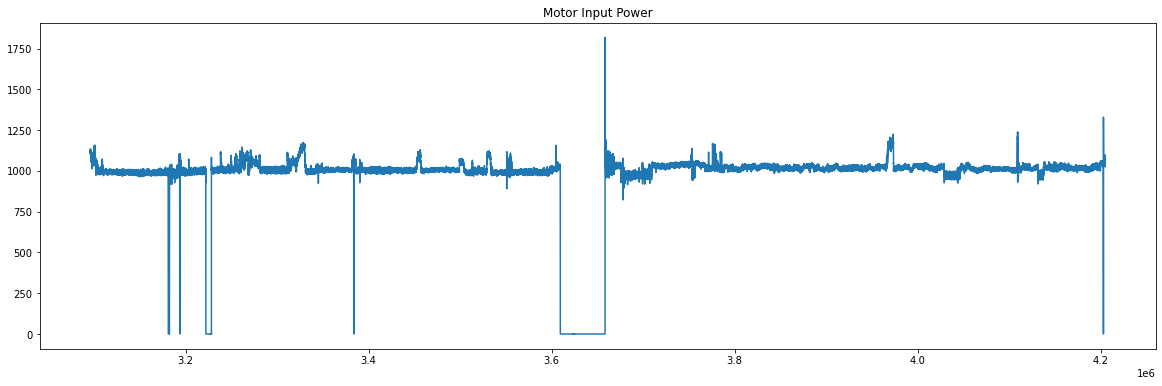

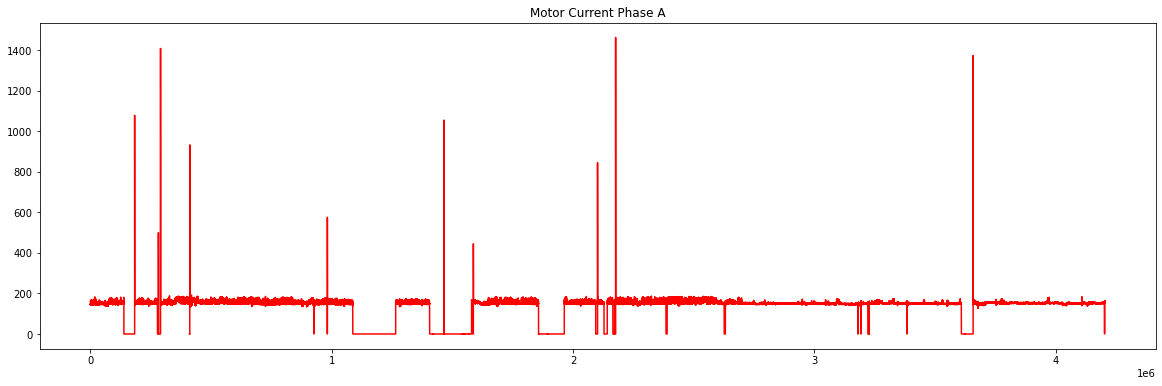

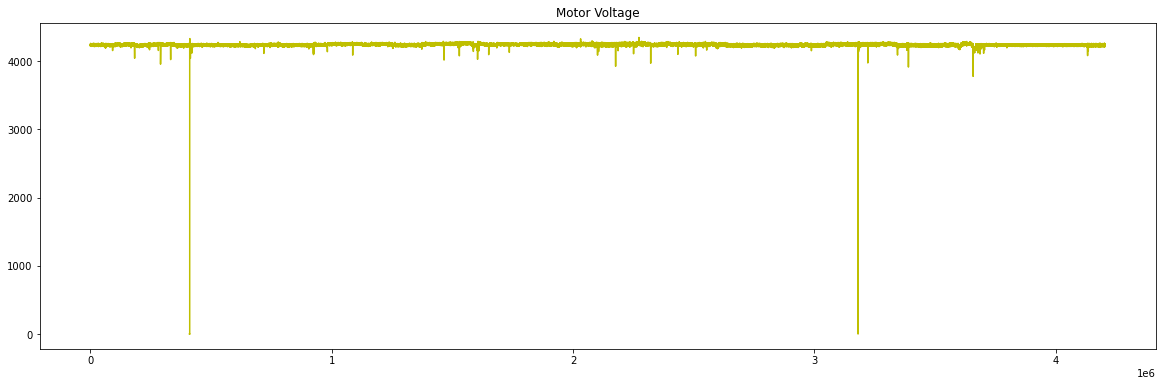

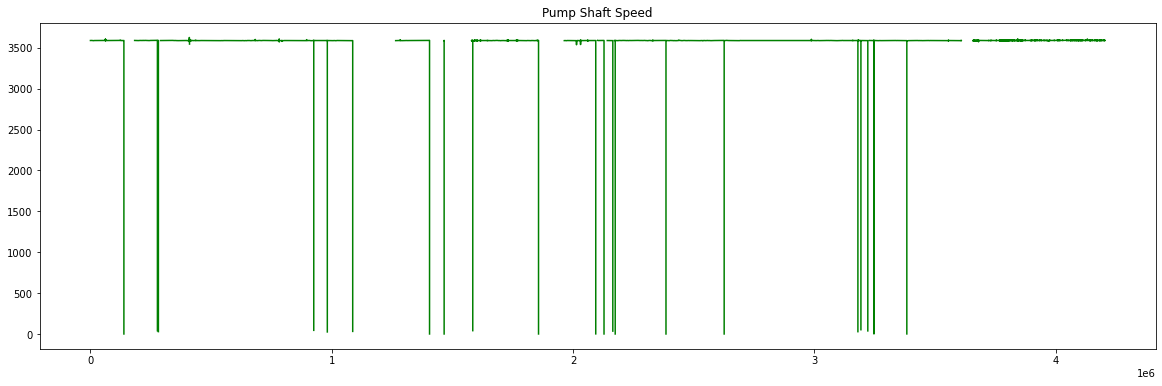

In [38]:
df['Motor Input Power'].plot(figsize=[20,6], title='Motor Input Power')
plt.show()
df['Motor Current Phase A'].plot(figsize=[20,6], color='r',title='Motor Current Phase A' )
plt.show()
df['Motor Voltage'].plot(figsize=[20,6], color='y',title='Motor Voltage')
plt.show()
df['Pump Shaft Speed'].plot(figsize=[20,6], color='g',title='Pump Shaft Speed')
plt.show()

It can be clearly observed that the above column categories come down to 0 many times, which may signify that the machine's operating condition changes from on-off. 

Modelling would require to filter out the 0 values of these columns as there are regular constant 0 values which will lead to bias in modelling.

## Data Filtering

In [4]:
# filering on the basis of pump shaft speed
df = df[df['Pump Shaft Speed']>3000].reset_index(drop=True)
df.head()

,Unnamed: 0,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [40]:
df.describe()

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
count,3.588278e+06,3.588278e+06,3.588280e+06,3.588280e+06,3.588271e+06,3.588266e+06,3.588203e+06,3.588280e+06,3.588149e+06,3.588149e+06,...,3.588213e+06,3.588165e+06,3.588244e+06,3.588282e+06,3.588277e+06,3.588233e+06,3.588278e+06,3.588202e+06,3.588194e+06,3.588243e+06
mean,1.295625e+03,1.295622e+03,3.115100e+05,3.124644e+05,1.731355e+03,1.734750e+03,7.964416e+01,8.284548e+01,1.526969e+02,1.527162e+02,...,1.410914e+02,1.466296e+02,8.895772e+00,3.589133e+03,2.447923e+01,1.677434e+01,3.564586e-01,2.267326e+02,1.034176e+02,9.366966e+01
std,7.183295e+01,7.170263e+01,6.009544e+04,6.679152e+04,8.220709e+01,8.238397e+01,1.455344e+01,1.514749e+01,5.844980e+00,5.828207e+00,...,6.627185e+00,4.849169e+00,1.050220e+00,1.001821e+00,6.202050e-01,5.288627e-01,8.322898e-02,5.519624e+00,1.082917e+01,1.230803e+01
min,-3.509497e+00,-3.456347e+00,0.000000e+00,0.000000e+00,1.885445e+01,1.499203e+01,3.834636e+01,3.893542e+01,0.000000e+00,0.000000e+00,...,4.971143e+01,4.974572e+01,4.559251e+00,3.099318e+03,-9.059578e-03,4.316585e+00,-5.949517e-02,7.298004e+01,6.192418e+01,5.242389e+01
25%,1.293033e+03,1.293462e+03,3.180053e+05,3.208379e+05,1.728799e+03,1.732510e+03,6.951834e+01,7.238956e+01,1.490000e+02,1.490210e+02,...,1.364049e+02,1.431141e+02,8.002185e+00,3.588703e+03,2.429189e+01,1.669548e+01,3.100448e-01,2.268286e+02,9.546984e+01,8.474932e+01
50%,1.300162e+03,1.300167e+03,3.243257e+05,3.287270e+05,1.748611e+03,1.752258e+03,7.977232e+01,8.246943e+01,1.513151e+02,1.513088e+02,...,1.407209e+02,1.460514e+02,8.644639e+00,3.588998e+03,2.455374e+01,1.682934e+01,3.309676e-01,2.271367e+02,1.027432e+02,9.317492e+01
75%,1.307118e+03,1.306707e+03,3.279437e+05,3.324728e+05,1.759008e+03,1.762463e+03,9.088562e+01,9.353547e+01,1.540000e+02,1.540000e+02,...,1.463264e+02,1.503797e+02,9.782559e+00,3.589745e+03,2.473174e+01,1.695525e+01,3.692663e-01,2.274854e+02,1.117928e+02,1.032905e+02
max,1.522039e+03,1.485783e+03,4.355689e+05,4.355188e+05,1.951435e+03,1.946133e+03,1.139856e+02,1.203881e+02,1.920000e+02,1.920000e+02,...,1.584870e+02,1.604716e+02,1.464056e+01,3.626543e+03,3.467742e+01,2.746343e+01,1.111553e+00,2.494325e+02,1.315183e+02,1.240305e+02


In [8]:
# Checking for outliers
df.quantile([0,0.01,0.25,0.5,0.75,0.9,0.95,0.99,1])

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0.00,-7.636613,-6.771245,0.00000,0.000000,17.042439,12.893926,32.432285,38.145237,0.000000,0.000000,...,41.231098,43.575928,0.000000,0.000000,-2.500569,-0.696365,-0.063086,54.354889,38.615856,38.436256
0.01,0.017247,0.014358,0.00000,0.000000,22.049307,18.942179,45.421556,48.752743,0.000000,0.000000,...,50.494530,50.530319,0.869764,3586.954102,3.695837,0.404995,-0.062133,60.796913,49.783033,49.292685
0.25,1292.431641,1292.884399,317366.34380,320153.406300,1724.833496,1728.388550,68.480103,71.886322,148.000000,148.000000,...,132.864380,140.856403,7.699702,3588.703369,24.295977,16.697914,0.296191,226.583298,90.384876,80.720345
0.50,1299.896851,1299.920410,324224.84380,328038.156300,1747.786377,1751.455200,79.121765,81.411118,150.962509,150.968842,...,139.257767,144.970207,8.365638,3588.998291,24.586378,16.850267,0.323973,227.038925,100.523041,90.892532
0.75,1306.909912,1306.519287,327939.31250,332155.906300,1758.330414,1761.804443,89.393486,91.384430,153.000000,153.000000,...,145.210449,149.418045,9.625259,3589.745361,24.808659,17.016968,0.358785,227.415756,110.167503,101.528423
0.90,1314.601563,1313.866699,330888.09380,334746.937500,1767.684204,1770.961426,97.782529,103.434944,159.316519,159.315445,...,149.784467,153.119615,10.372310,3589.998047,25.344891,17.574092,0.440782,227.764877,117.527466,109.543259
0.95,1320.676270,1319.778809,332586.84380,336268.218800,1777.020965,1779.747437,101.889130,107.933849,164.313885,164.347826,...,151.534512,154.602142,10.634660,3590.928467,25.877775,17.798008,0.519426,227.959534,120.664101,112.920036
0.99,1333.603805,1332.684326,335833.18438,339499.677516,1805.929022,1807.089245,108.013202,113.274455,173.333234,173.347934,...,154.377779,157.035444,11.025861,3591.557617,26.294129,18.110916,0.672816,228.347612,125.799154,118.212357
1.00,1522.038940,1485.783203,435568.93750,435518.750000,1951.434692,1946.132935,113.985558,120.388084,1462.750244,1468.593506,...,158.487000,160.471634,25.410971,3626.543457,36.664894,28.158882,1.111553,249.448349,131.518341,124.030472


Some outliers are present, visualize them for the necessary columns.

In [41]:
df.corr()

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
Auxiliary Boilers A/B Feed Water Header Pressure 2,1.000000,0.998630,0.307410,0.258288,0.541053,0.544180,-0.014426,-0.011095,-0.021678,-0.025068,...,-0.003517,0.011403,0.043218,-0.015668,0.234699,0.284942,-0.005261,0.461092,-0.008701,-0.010601
Auxiliary Boilers Feed Water Header Pressure,0.998630,1.000000,0.307919,0.258726,0.542271,0.545402,-0.014397,-0.011012,-0.022407,-0.025810,...,-0.003388,0.011549,0.043410,-0.015880,0.235502,0.285759,-0.005686,0.461939,-0.008651,-0.010555
Heat Recovery System Header Mass Flow,0.307410,0.307919,1.000000,0.638123,0.045723,0.058611,-0.065037,-0.057837,0.096489,0.099403,...,-0.066479,-0.058714,0.042109,-0.080925,0.114641,0.149401,0.041785,0.357230,-0.063636,-0.062229
Heat Recovery System Header Mass Flow.1,0.258288,0.258726,0.638123,1.000000,-0.002669,0.002213,0.017619,0.026181,0.143790,0.145283,...,0.018837,0.017774,-0.012482,-0.105688,0.093277,0.122306,0.079409,0.302661,0.016604,0.020156
Heat Recovery System Header Pressure,0.541053,0.542271,0.045723,-0.002669,1.000000,0.999782,0.064964,0.072537,-0.607968,-0.611464,...,0.051909,0.098357,0.018003,0.146093,0.343012,0.365292,-0.582479,0.300468,0.082376,0.073173
Heat Recovery System Header Pressure.1,0.544180,0.545402,0.058611,0.002213,0.999782,1.000000,0.064120,0.071825,-0.606497,-0.610013,...,0.050926,0.097181,0.017904,0.145934,0.344248,0.366904,-0.581383,0.304373,0.081432,0.072300
Lube Oil Cooler Outlet Temperature,-0.014426,-0.014397,-0.065037,0.017619,0.064964,0.064120,1.000000,0.985980,-0.143219,-0.141072,...,0.940447,0.928494,-0.602959,-0.220508,-0.093522,0.039219,-0.064688,-0.053133,0.993791,0.997673
Lube Oil Tank Temperature,-0.011095,-0.011012,-0.057837,0.026181,0.072537,0.071825,0.985980,1.000000,-0.152789,-0.150758,...,0.939574,0.927902,-0.600989,-0.231922,-0.064889,0.055484,-0.070285,-0.043966,0.984072,0.986339
Motor Current Phase A,-0.021678,-0.022407,0.096489,0.143790,-0.607968,-0.606497,-0.143219,-0.152789,1.000000,0.996264,...,-0.110937,-0.180141,0.002793,-0.244572,-0.396785,-0.423274,0.958470,-0.091617,-0.167013,-0.153013
Motor Current Phase B,-0.025068,-0.025810,0.099403,0.145283,-0.611464,-0.610013,-0.141072,-0.150758,0.996264,1.000000,...,-0.107952,-0.175471,0.004572,-0.253863,-0.399746,-0.425822,0.956318,-0.091815,-0.164153,-0.150599


In [5]:
# Convert Timestamp todatetime format

from datetime import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3588282 entries, 0 to 3588281
Series name: timestamp
Non-Null Count    Dtype         
--------------    -----         
3588282 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 27.4 MB


In [6]:
# Checking for null values
df.isnull().sum()/len(df)*100

Unnamed: 0                                             0.000000
timestamp                                              0.000000
Auxiliary Boilers A/B Feed Water Header Pressure 2     0.000111
Auxiliary Boilers Feed Water Header Pressure           0.000111
Heat Recovery System Header Mass Flow                  0.000056
Heat Recovery System Header Mass Flow.1                0.000056
Heat Recovery System Header Pressure                   0.000307
Heat Recovery System Header Pressure.1                 0.000446
Lube Oil Cooler Outlet Temperature                     0.002202
Lube Oil Tank Temperature                              0.000056
Motor Current Phase A                                  0.003707
Motor Current Phase B                                  0.003707
Motor Current Phase C                                  0.003762
Motor Input Power                                     70.689595
Motor Power Factor                                    70.689818
Motor Voltage                           

In [7]:
# Drop the columns with more than 60% missing values: i.e drop Motor Input Power and Motor Power Factor 

df.drop(['Motor Power Factor','Motor Input Power'], axis=1, inplace=True)
df.head()

,Unnamed: 0,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


As these are time based data, normal imputing methods like mean and median won't work. So forward or backward fill will maintain the distribution of these columns as these are just 15 seconds separated values.

In [8]:
# dealing with the nulls by ffill
df = df.fillna(method='ffill')
df.isnull().sum()

Unnamed: 0                                            0
timestamp                                             0
Auxiliary Boilers A/B Feed Water Header Pressure 2    0
Auxiliary Boilers Feed Water Header Pressure          0
Heat Recovery System Header Mass Flow                 0
Heat Recovery System Header Mass Flow.1               0
Heat Recovery System Header Pressure                  0
Heat Recovery System Header Pressure.1                0
Lube Oil Cooler Outlet Temperature                    0
Lube Oil Tank Temperature                             0
Motor Current Phase A                                 0
Motor Current Phase B                                 0
Motor Current Phase C                                 0
Motor Voltage                                         0
Pump Discharge Pressure                               0
Pump Discharge Volumetric Flow                        0
Pump Journal 1 Bearing Temperature                    0
Pump Journal 2 Bearing Temperature              

In [9]:
df.shape

(3588282, 26)

In [10]:
# Handling outliers
cols = df.loc[:, df.columns!='timestamp']

Q1 = cols.quantile(0.25)
Q3 = cols.quantile(0.75)
IQR = Q3 - Q1

df = df[~((cols < (Q1 - 1.5 * IQR)) |(cols > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
df.shape

(2651166, 26)

In [39]:
df.quantile([0,0.01,0.25,0.5,0.75,0.9,0.95,0.99,1])

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0.00,1271.905884,1273.593994,303098.062500,303387.125000,1683.486084,1687.580688,42.700100,41.696850,142.000000,142.000000,...,121.530197,132.222046,6.103134,3587.140381,23.632126,16.305834,0.223862,225.843384,80.531578,66.233498
0.01,1276.504517,1277.844604,305634.446925,307544.125000,1690.961261,1694.514282,50.567574,52.128353,146.667067,147.000000,...,128.692320,138.126261,7.318151,3587.636963,23.869365,16.427306,0.272217,226.160731,82.897143,69.917719
0.25,1293.462769,1293.885010,319650.031300,322541.468800,1739.759766,1743.436646,70.424517,73.204899,149.000000,149.000000,...,136.640537,143.318787,7.992675,3588.925537,24.369333,16.738804,0.308218,226.869064,96.078461,85.422495
0.50,1300.096558,1300.112183,324778.906300,329535.500000,1750.625000,1754.267700,80.323956,83.066914,151.000000,151.000000,...,140.830551,146.340408,8.607887,3588.998291,24.581841,16.846121,0.325362,227.146606,103.256386,93.724899
0.75,1306.579224,1306.186523,328046.343800,332724.468800,1758.979492,1762.451141,91.788816,95.121908,152.000000,152.000000,...,146.802750,150.865021,9.716658,3589.757324,24.731476,16.957193,0.346662,227.468018,112.609137,104.139481
0.90,1312.818726,1312.063415,330789.968800,335024.250000,1765.724670,1769.125793,99.258251,105.194237,154.625000,154.363762,...,150.392334,153.715988,10.425075,3589.991455,24.872854,17.066174,0.377261,227.769760,118.741875,110.851017
0.95,1316.775848,1315.820435,332468.187500,336419.296875,1769.114868,1772.482544,103.032557,109.139759,156.000000,156.000000,...,151.935696,155.003647,10.657792,3590.893555,24.969570,17.133097,0.400213,227.934326,121.592390,113.862032
0.99,1323.495117,1322.257813,335527.073455,339485.407830,1775.284753,1778.542969,108.530946,113.940836,158.000000,158.000000,...,154.672404,157.220846,11.045541,3590.981934,25.184268,17.263397,0.438404,228.235311,126.167125,118.638727
1.00,1328.244995,1326.574341,342816.625000,349903.937500,1803.920776,1806.792358,113.985558,119.760498,160.030823,160.000000,...,158.171402,160.471634,11.981857,3591.308105,25.391483,17.344881,0.458098,228.470551,131.065872,123.581261


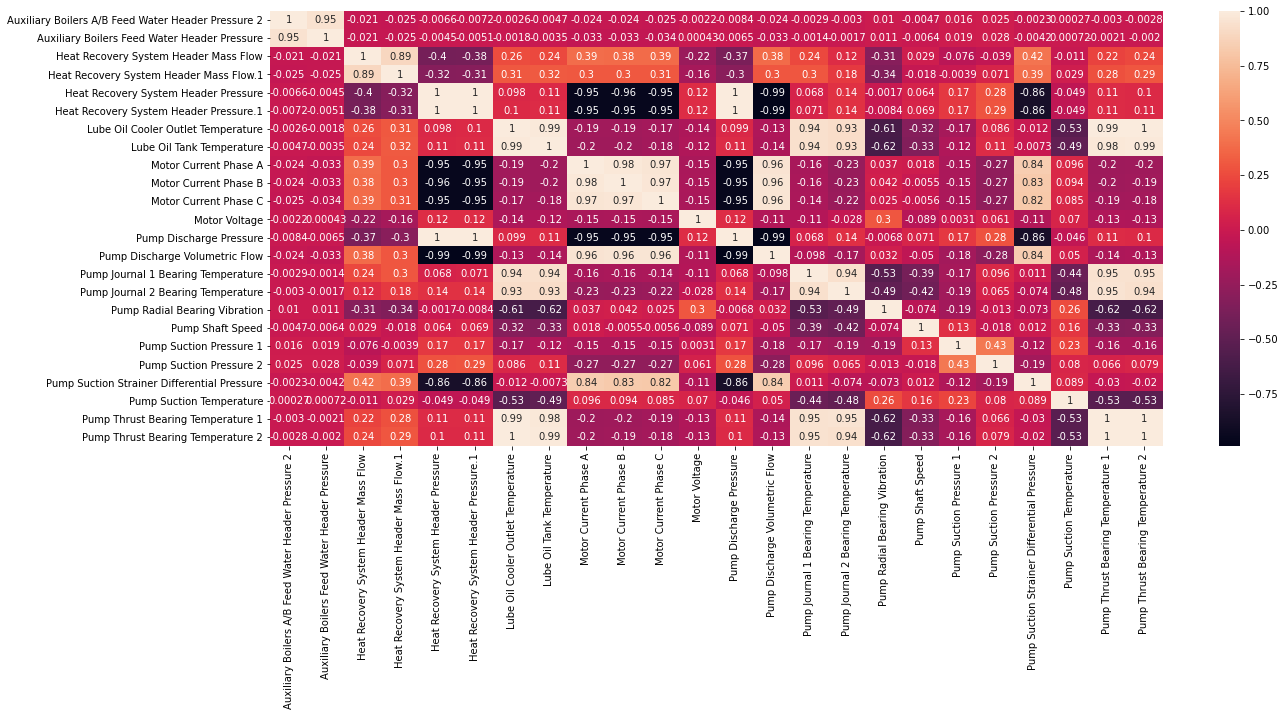

In [40]:
plt.figure(figsize=[20,8])
sns.heatmap(df.corr(), annot=True)
plt.show()

High correlation mostly exists between similar type of columns, i.e columns belonging to the same categories.

<AxesSubplot:>

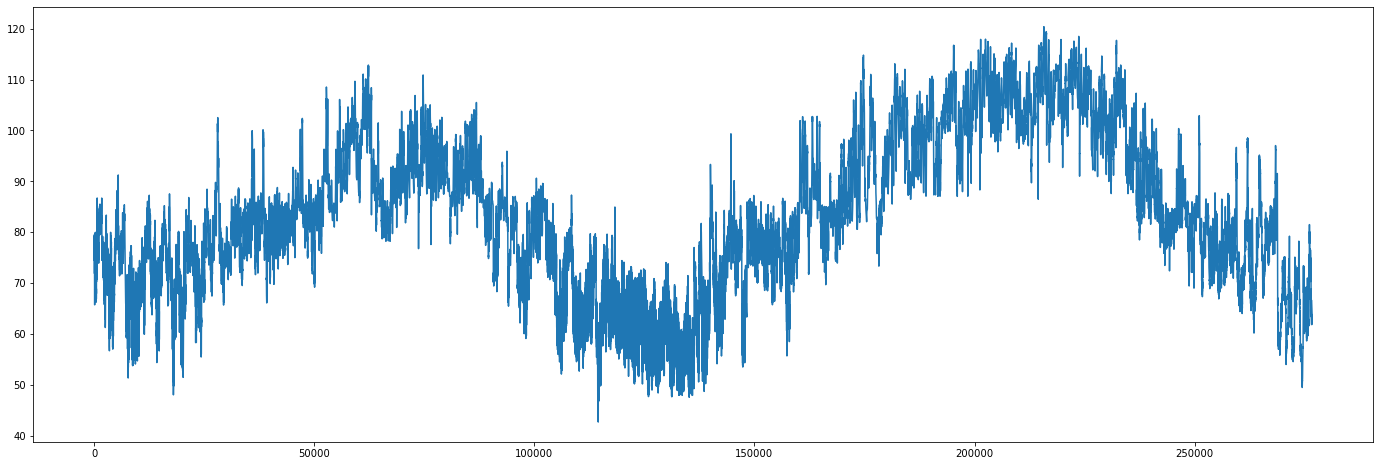

In [17]:
df.loc[::10, 'Lube Oil Tank Temperature'].reset_index(drop=True).plot(figsize=[24,8])

In [42]:
# Dropping the highly correlated columns

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]
print(to_drop)

['Heat Recovery System Header Pressure.1', 'Lube Oil Tank Temperature', 'Motor Current Phase A', 'Motor Current Phase B', 'Motor Current Phase C', 'Pump Discharge Pressure', 'Pump Discharge Volumetric Flow', 'Pump Thrust Bearing Temperature 1', 'Pump Thrust Bearing Temperature 2']


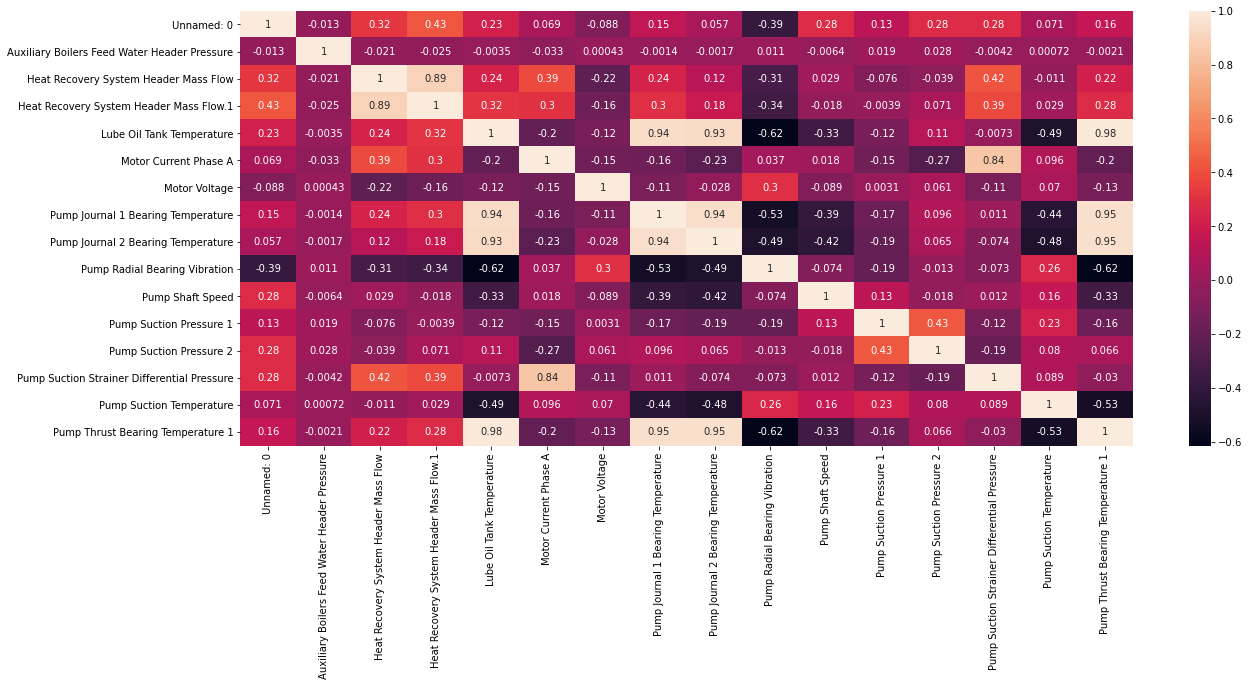

In [12]:
df1 = df.drop(['Auxiliary Boilers A/B Feed Water Header Pressure 2', 'Heat Recovery System Header Pressure.1','Lube Oil Cooler Outlet Temperature',
                'Motor Current Phase C', 'Motor Current Phase B', 'Pump Discharge Pressure','Pump Thrust Bearing Temperature 2', 'Pump Discharge Volumetric Flow',
                'Heat Recovery System Header Pressure'], axis=1)
plt.figure(figsize=[20,8])
sns.heatmap(df1.corr(), annot=True)
plt.show()                
                

In [44]:
df1.columns

Index(['timestamp', 'Auxiliary Boilers Feed Water Header Pressure',
       'Heat Recovery System Header Mass Flow',
       'Heat Recovery System Header Mass Flow.1', 'Lube Oil Tank Temperature',
       'Motor Current Phase A', 'Motor Voltage',
       'Pump Journal 1 Bearing Temperature',
       'Pump Journal 2 Bearing Temperature', 'Pump Radial Bearing Vibration',
       'Pump Shaft Speed', 'Pump Suction Pressure 1',
       'Pump Suction Pressure 2',
       'Pump Suction Strainer Differential Pressure',
       'Pump Suction Temperature', 'Pump Thrust Bearing Temperature 1'],
      dtype='object')

<AxesSubplot:xlabel='Lube Oil Tank Temperature', ylabel='Pump Radial Bearing Vibration'>

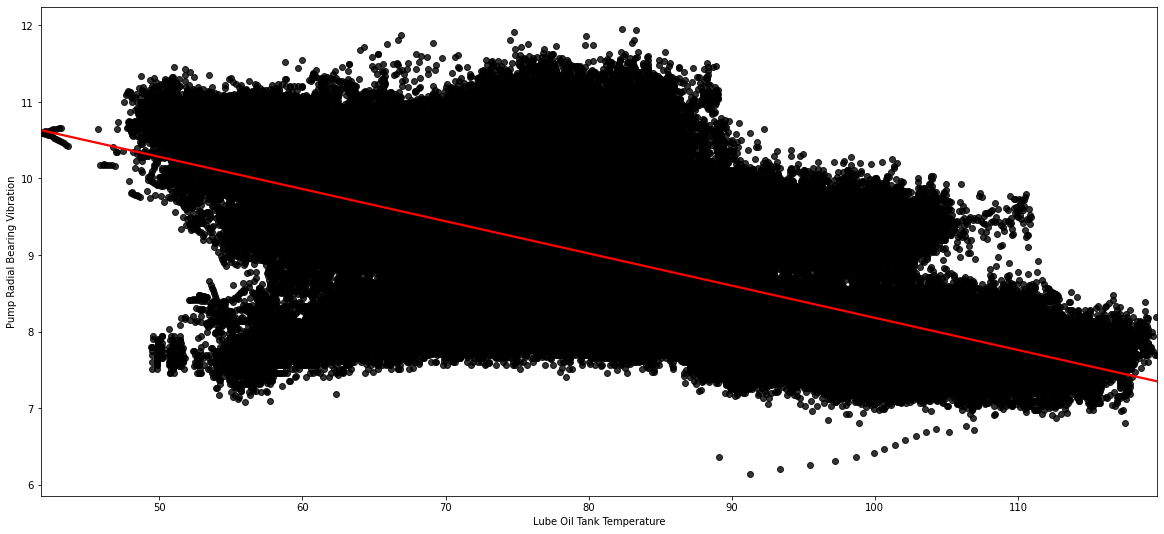

In [48]:
plt.figure(figsize=(20,9))
sns.regplot(x=df1.loc[::10,"Lube Oil Tank Temperature"], 
            y=df1.loc[::10,"Pump Radial Bearing Vibration"], 
            scatter_kws={"color": "black"}, 
            line_kws={"color": "red"})

There is a clear relation between Lube oil Tank Temperature and the target variable. As the tank temperatue increases, the vibrations decreases.

<AxesSubplot:xlabel='Heat Recovery System Header Mass Flow', ylabel='Pump Radial Bearing Vibration'>

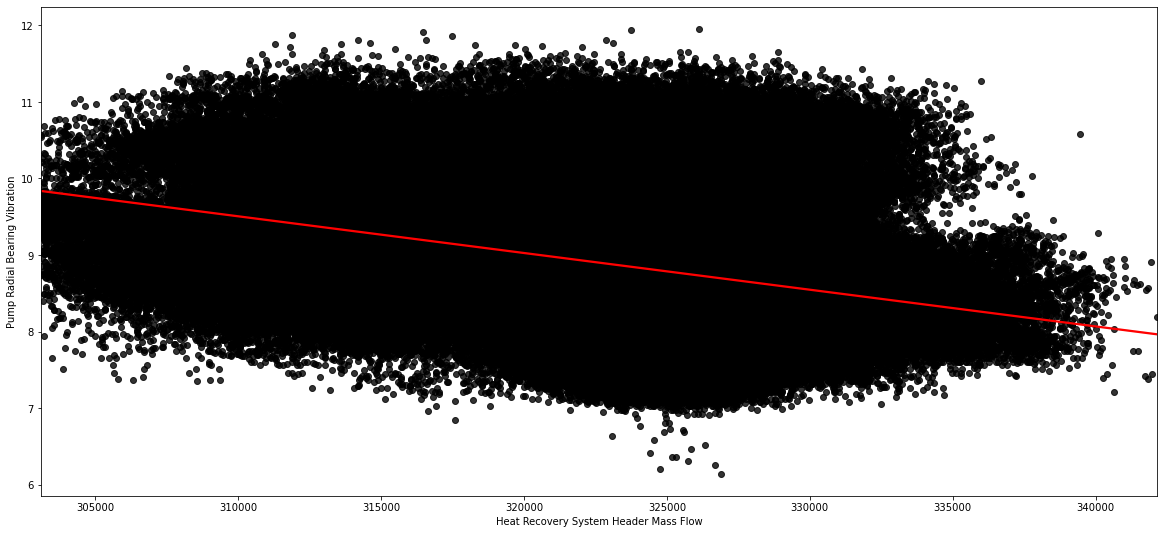

In [49]:
plt.figure(figsize=(20,9))
sns.regplot(x=df1.loc[::10,"Heat Recovery System Header Mass Flow"], 
            y=df1.loc[::10,"Pump Radial Bearing Vibration"], 
            scatter_kws={"color": "black"}, 
            line_kws={"color": "red"})

The realtion between Heat Recovery System Header Mass Flow and the target variable is compartively weaker. 

<AxesSubplot:xlabel='Motor Current Phase A', ylabel='Pump Radial Bearing Vibration'>

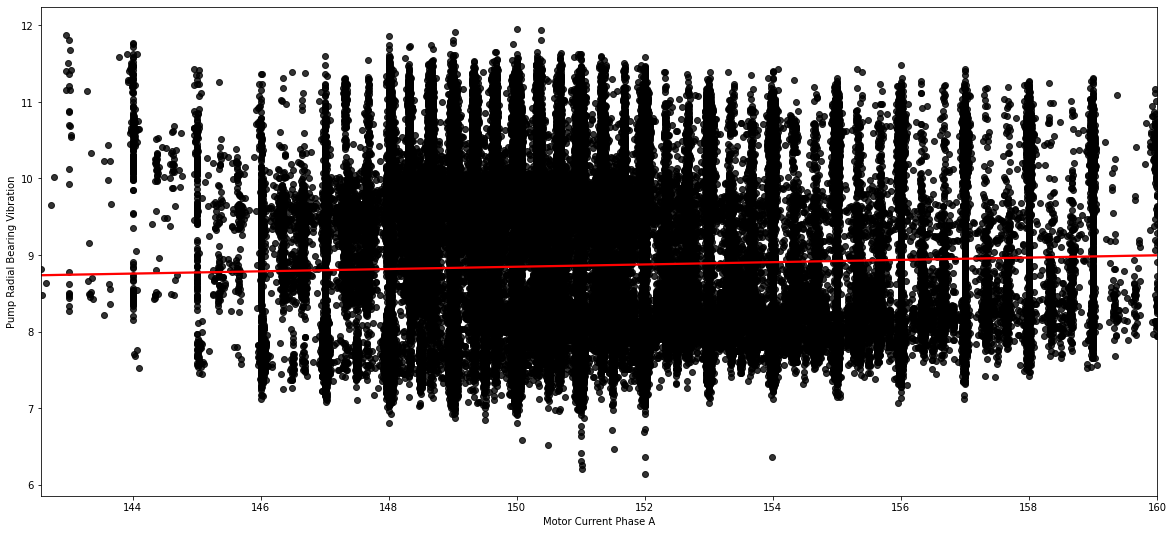

In [50]:
plt.figure(figsize=(20,9))
sns.regplot(x=df1.loc[::10,"Motor Current Phase A"], 
            y=df1.loc[::10,"Pump Radial Bearing Vibration"], 
            scatter_kws={"color": "black"}, 
            line_kws={"color": "red"})

There is no clear correlation between Current and target variable. Current may act as a contributing column and it's feature importance must be checked.

<AxesSubplot:xlabel='Motor Voltage', ylabel='Pump Radial Bearing Vibration'>

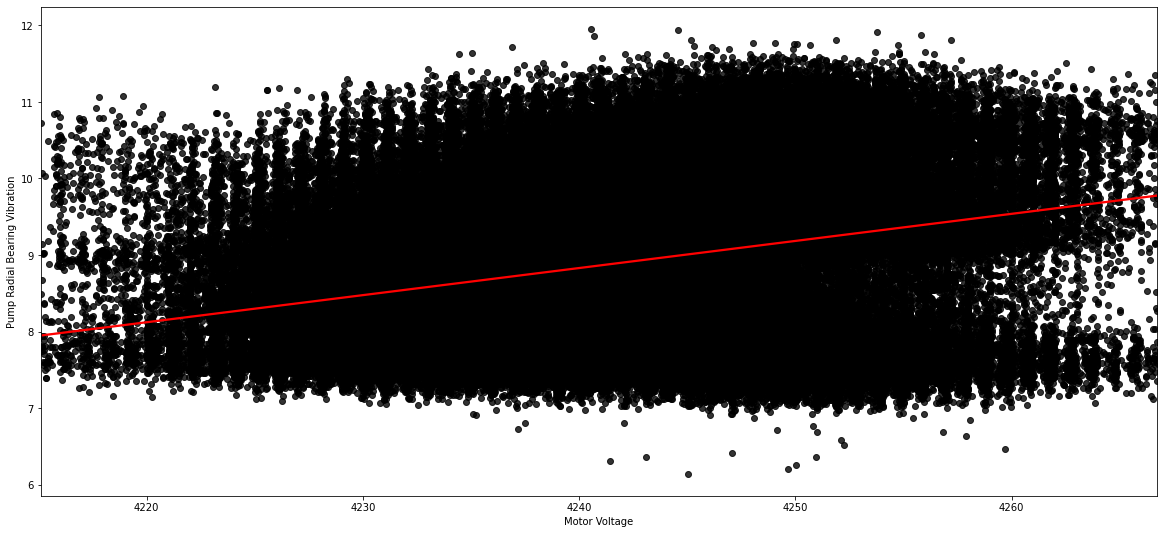

In [51]:
plt.figure(figsize=(20,9))
sns.regplot(x=df1.loc[::10,"Motor Voltage"], 
            y=df1.loc[::10,"Pump Radial Bearing Vibration"], 
            scatter_kws={"color": "black"}, 
            line_kws={"color": "red"})

The target variable increases with the increase in motor voltage.

In [304]:
# Defining X and y variables
X = df1.drop(['timestamp', 'Pump Radial Bearing Vibration'],axis=1)
y = df1['Pump Radial Bearing Vibration']

In [27]:
X.head()

,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Lube Oil Tank Temperature,Motor Current Phase A,Motor Voltage,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1
1,1299.925171,303027.7500,303782.2813,76.948776,145.000000,4235.000000,137.133484,144.299057,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756
2,1294.646606,301878.9688,303518.4375,76.932243,146.306839,4236.454590,137.131317,144.298004,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716
3,1299.988770,302023.0625,303576.3750,76.912827,146.000000,4232.772461,137.129150,144.296936,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683
4,1300.749023,301972.0625,303999.5313,76.892960,146.305389,4240.088379,137.126968,144.295883,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650
5,1299.165527,302555.0625,303541.2500,76.873093,146.000000,4231.694824,137.124802,144.294830,3589.284180,25.003630,16.883806,0.274055,226.740112,98.070610


In [14]:
df1.to_csv('data/cleaned.csv')